In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨지는 것도 방지
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [6]:
df = pd.read_csv('Pizza Sales Dataset.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_day,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,Thursday,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,Thursday,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,Thursday,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_day', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

### 컬럼명 한국어로 바꾸기

In [15]:
df.rename(columns={
    'pizza_id': '피자 ID',
    'order_id': '주문 ID',
    'pizza_name_id': '피자 이름 ID',
    'quantity': '주문 수량',
    'order_date': '주문 날짜',
    'order_day': '주문 요일',
    'order_time': '주문 시간',
    'unit_price': '단가',
    'total_price': '총액',
    'pizza_size': '피자 사이즈',
    'pizza_category': '피자 종류',
    'pizza_ingredients': '피자 재료 목록',
    'pizza_name': '피자 이름'
}, inplace=True)

In [17]:
# 결측치 확인 : 없음
df.isna().sum()

피자 ID       0
주문 ID       0
피자 이름 ID    0
주문 수량       0
주문 날짜       0
주문 요일       0
주문 시간       0
단가          0
총액          0
피자 사이즈      0
피자 종류       0
피자 재료 목록    0
피자 이름       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   피자 ID     48620 non-null  int64  
 1   주문 ID     48620 non-null  int64  
 2   피자 이름 ID  48620 non-null  object 
 3   주문 수량     48620 non-null  int64  
 4   주문 날짜     48620 non-null  object 
 5   주문 요일     48620 non-null  object 
 6   주문 시간     48620 non-null  object 
 7   단가        48620 non-null  float64
 8   총액        48620 non-null  float64
 9   피자 사이즈    48620 non-null  object 
 10  피자 종류     48620 non-null  object 
 11  피자 재료 목록  48620 non-null  object 
 12  피자 이름     48620 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


# 분석 시작

### 1. ⏰ **시간대별 주문량 분석 (피크타임 파악)**

- **목표**: 언제 사람들이 피자를 가장 많이 먹는가?
- **시각화**: `order_time` (= `주문 시간` ) 기준 막대 그래프
- **활용**: 매장 인력 운영, 프로모션 타이밍 설계

In [26]:
# 날짜/시간 데이터 정리. > 주문 날짜, 주문 시간 datetime 타입으로 변환
# 날짜 + 시간 합쳐서 datetime 열 만들기
df['주문일시'] = pd.to_datetime(df['주문 날짜'] + ' ' + df['주문 시간'])

# 요일도 숫자로 변경
# 영어 요일 → 한글 매핑
요일_매핑 = {
    'Monday': '월요일',
    'Tuesday': '화요일',
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
}

df['주문 요일'] = df['주문 요일'].map(요일_매핑)

# 순서 설정
요일_순서 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['주문 요일'] = pd.Categorical(df['주문 요일'], categories=요일_순서, ordered=True)

df['요일_번호'] = df['주문일시'].dt.dayofweek  # 월=0 ~ 일=6
df['시간대'] = df['주문일시'].dt.hour

In [28]:
# '시간대' 컬럼을 기준으로 주문 수 세기
시간대별_주문량 = df['시간대'].value_counts().sort_index()
print(시간대별_주문량)

시간대
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


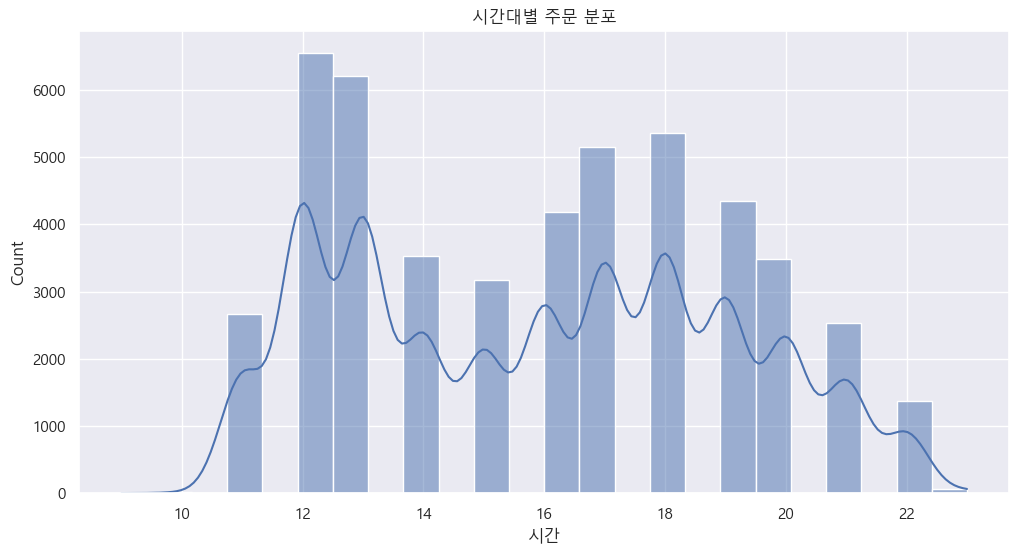

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 주문량
sns.histplot(df['시간대'], bins=24, kde=True)
plt.title('시간대별 주문 분포')
plt.xlabel('시간')
plt.show()

## ✅ 시간대별 피자 주문 인사이트

---

### 📊 분석 개요

- **분석 대상**: 피자 주문 데이터  
- **기준**: 주문 일시에서 추출한 **시간대(hour 단위)** 기준으로 주문 수량 집계  
- **시각화**: 히스토그램 + KDE(커널 밀도 추정)로 **주문 집중 시간대 시각화**

---

### ⏰ 주요 인사이트

- 주문량은 **오전보다는 오후~저녁 시간**에 집중됨
  - **정오(12시)** 와 **오후 1시(13시)**: 점심 시간대에 **첫 번째 피크**
  - **오후 5시~7시(17~19시)**: 퇴근 이후 및 저녁 시간대에 **두 번째 피크**
  - → 두 구간 모두 **식사 시간**과 일치 → 피자 주문이 **식사 대용**으로 집중됨

- **오전 시간대(10시 이전)** 와 **늦은 밤(22시 이후)** 에는 주문 거의 없음  
  → 운영 시간이 제한되었거나, 소비자 니즈가 낮은 시간대

- **가장 주문이 많은 시간**: **정오(12시)**  
  → 마케팅/프로모션 타이밍으로 활용 가능  
  → **배달 인력, 오븐 등 리소스 확보 필요**

- 점심 시간과 저녁 시간 사이인 **14~16시**는 주문량이 감소  
  → **브레이크 타임**으로 해석 가능  
  → **할인/세트 구성 등 수요 창출 전략** 시도할 수 있는 시간대

---

### 💡 활용 제안

- **정오~오후 1시**, **오후 5시~7시** 중심으로 **프로모션 집중**
- **리소스 배치 최적화** (배달 인력, 재료 준비 등) → 피크 시간 대응
- **오후 2시~4시** 사이를 활용한  
  → **간식형 메뉴 출시** or **할인 메뉴 전략** 도입 고려

### 2. 📅 **요일별 주문량 분석 (주말 특수 여부)**

- **목표**: 피자 수요는 주중 vs 주말 어떻게 다른가?
- **시각화**: `order_day` (= `주문 요일`) 기준 막대 그래프
- **활용**: 주말 집중 마케팅 or 할인 전략 근거

In [33]:
# '주문 요일' 컬럼을 기준으로 주문 수 세기 (요일 순서 보장)
요일별_주문량 = df['주문 요일'].value_counts().reindex(요일_순서)
print(요일별_주문량)

주문 요일
월요일    6369
화요일    6753
수요일    6797
목요일    7323
금요일    8106
토요일    7355
일요일    5917
Name: count, dtype: int64


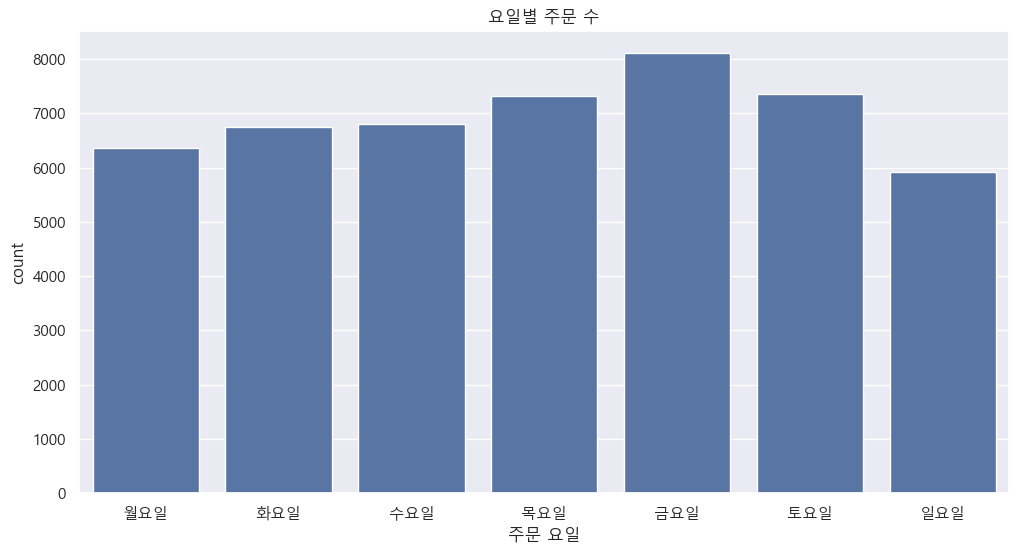

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 주문 수
sns.countplot(data=df, x='주문 요일', order=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.title('요일별 주문 수')
plt.show()

In [74]:
# 주중/주말 구분 컬럼 생성
def 구분_주중_주말(요일):
    if 요일 in ['토요일', '일요일']:
        return '주말'
    else:
        return '주중'

df['주중/주말'] = df['주문 요일'].apply(구분_주중_주말)

주중주말_주문수 = df['주중/주말'].value_counts()
print(주중주말_주문수)

주중/주말
주중    35348
주말    13272
Name: count, dtype: int64


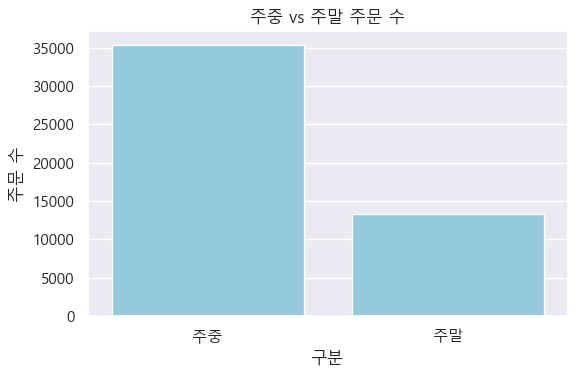

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='주중/주말', order=['주중', '주말'], color='skyblue')  # palette 대신 color 사용
plt.title('주중 vs 주말 주문 수')
plt.xlabel('구분')
plt.ylabel('주문 수')
plt.tight_layout()
plt.show()

In [76]:
주중_총주문 = 주중주말_주문수['주중']
주말_총주문 = 주중주말_주문수['주말']

주중_일평균 = 주중_총주문 / 5
주말_일평균 = 주말_총주문 / 2

print(f"주중 하루 평균 주문수: {주중_일평균:.2f}")
print(f"주말 하루 평균 주문수: {주말_일평균:.2f}")

주중 하루 평균 주문수: 7069.60
주말 하루 평균 주문수: 6636.00


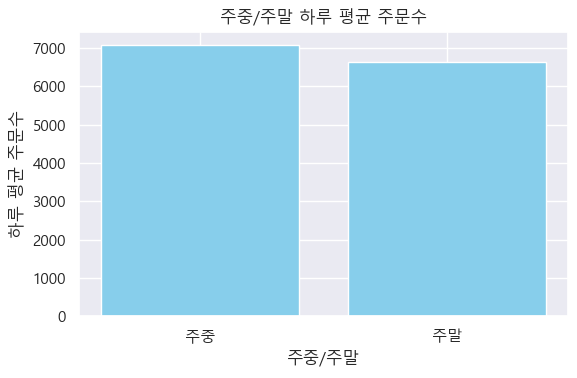

In [90]:
import matplotlib.pyplot as plt

labels = ['주중', '주말']
averages = [주중_일평균, 주말_일평균]

plt.figure(figsize=(6, 4))
plt.bar(labels, averages, color='skyblue')
plt.title('주중/주말 하루 평균 주문수')
plt.ylabel('하루 평균 주문수')
plt.xlabel('주중/주말')
plt.tight_layout()
plt.show()

## ✅ 요일별 & 주중/주말 피자 주문 인사이트

---

### 📊 분석 개요

- **분석 대상**: 해외 피자 주문 데이터셋 (미국 기반 추정)
- **분석 항목**:
  - `주문 요일` 기준 요일별 주문량 집계
  - `주중/주말` 기준 주문 분포 및 하루 평균 주문 수 비교

---

### 📅 요일별 인사이트

- **주중(월~금)** 주문량이 **전체의 70% 이상** 차지
- 특히 **수요일~금요일** 사이 주문량이 높음  
  → 직장 내 점심 회식, 업무 피로 누적과 관련된 소비 패턴으로 해석 가능

- **주말(토~일)**에도 주문량이 적지 않음  
  → **가정/개인 중심 소비**, **여가/주말 외식 대체 수요**가 존재

---

### 📆 주중/주말 비교 인사이트

| 구분 | 총 주문 수 | 하루 평균 주문 수 |
|------|------------|-------------------|
| 주중 | 약 35,000건 | 약 7,000건         |
| 주말 | 약 13,000건 | 약 6,600건         |

- **총 주문 수 기준으로는 주중 우세**,  
  하지만 **하루 평균 주문량은 주중·주말이 큰 차이 없음**
- **주말 수요도 충분히 의미 있는 수준**  
  → 주말 타깃 마케팅 및 운영 전략도 필요


---


### 🌍 미국 문화적 배경 참고

> 미국에서는 피자가 **단순 간식이 아닌 "한 끼 식사" 혹은 주식 대체재**로 활용되는 경우가 많음  
> 특히 **사무실/학교/단체 중심 점심 대량 주문** 문화가 강함  
> → 이로 인해 **주중 수요가 자연스럽게 높게 나타날 수 있음**


---


### 💡 한국 시장 적용 제안

| 요일 구간 | 전략 방향 |
|-----------|-----------|
| 주중 (월~금) | **오피스 중심 점심 메뉴 구성**<br>빠른 배달, 1인 세트, 기업 할인 |
| 주말 (토~일) | **가족·개인 타깃 프로모션**<br>홈파티 세트, 키즈 세트, 여가 연계 |

- **요일별 트렌드 분석 기반으로 운영 인력, 광고 예산, 메뉴 구성**에 차별화 적용
- **하루 평균 수요 기준**으로도 **주말을 절대적으로 놓쳐선 안 됨!**


---


> ✅ 미국 데이터 특성 이해를 바탕으로 하되,  
> **한국의 소비 문화(회식, 야근, 가족 외식 등)에 맞춘 재해석이 핵심**

### 3. 🍕 **피자 종류별 판매량 TOP 10**

- **목표**: 어떤 피자가 잘 팔리는가?
- **시각화**: `pizza_name` (=`피자 이름`) 기준 상위 판매량 그래프
- **활용**: 메뉴 구성 / 베스트 메뉴 강조 포스터 설계

In [67]:
# 피자 이름별로 주문 수량 합산
피자_수량_전체 = df.groupby('피자 이름')['주문 수량'].sum().sort_values(ascending=False)

# 전체 결과 확인
print(피자_수량_전체)

피자 이름
The Classic Deluxe Pizza                      2453
The Barbecue Chicken Pizza                    2432
The Hawaiian Pizza                            2422
The Pepperoni Pizza                           2418
The Thai Chicken Pizza                        2371
The California Chicken Pizza                  2370
The Sicilian Pizza                            1938
The Spicy Italian Pizza                       1924
The Southwest Chicken Pizza                   1917
The Big Meat Pizza                            1914
The Four Cheese Pizza                         1902
The Italian Supreme Pizza                     1884
The Vegetables + Vegetables Pizza             1526
The Mexicana Pizza                            1484
The Napolitana Pizza                          1464
The Prosciutto and Arugula Pizza              1457
The Spinach and Feta Pizza                    1446
The Pepper Salami Pizza                       1446
The Italian Capocollo Pizza                   1438
The Greek Pizza          

In [65]:
# 상위 10개만 추출
피자_상위10 = 피자_수량_전체.head(10)

# 확인
print(피자_상위10)

피자 이름
The Classic Deluxe Pizza        2453
The Barbecue Chicken Pizza      2432
The Hawaiian Pizza              2422
The Pepperoni Pizza             2418
The Thai Chicken Pizza          2371
The California Chicken Pizza    2370
The Sicilian Pizza              1938
The Spicy Italian Pizza         1924
The Southwest Chicken Pizza     1917
The Big Meat Pizza              1914
Name: 주문 수량, dtype: int64


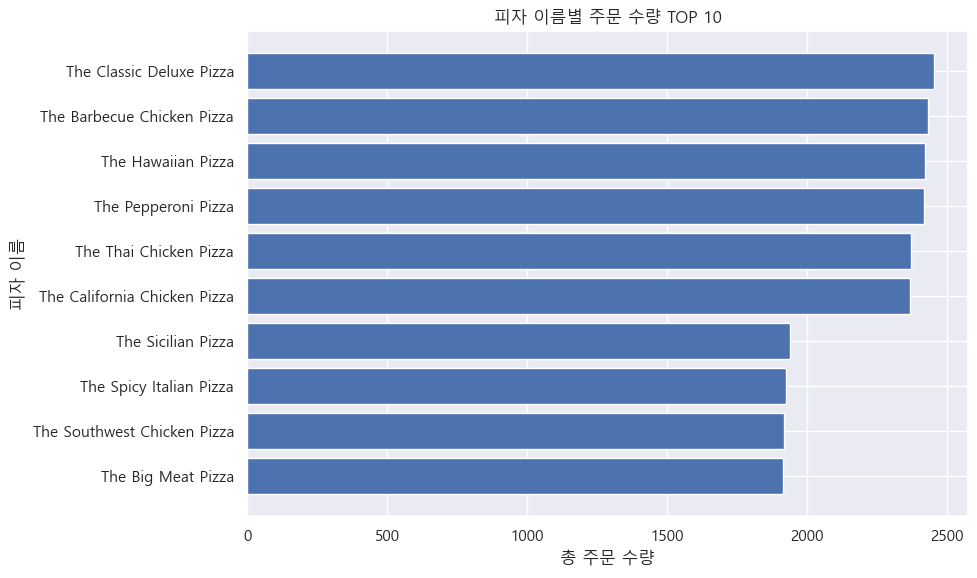

In [94]:
# 피자 이름별 주문 수량 TOP10 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(피자_상위10.index[::-1], 피자_상위10.values[::-1])  # 큰 값이 위로 오도록 순서 반전
plt.title('피자 이름별 주문 수량 TOP 10')
plt.xlabel('총 주문 수량')
plt.ylabel('피자 이름')
plt.tight_layout()
plt.show()

## ✅ 피자 이름별 주문 수량 TOP 10 인사이트

---

### 📊 분석 개요

- **분석 대상**: 피자 주문 데이터  
- **기준**: `'피자 이름'` 기준으로 `'주문 수량'`을 합산하여 전체 판매량 집계  
- **정렬 방식**: 총 주문 수량 기준으로 내림차순 정렬  
- **상위 10종 피자** 추출 및 시각화

---

### 🥇 판매량 상위 TOP 10 피자

1. **The Classic Deluxe Pizza**
2. **The Barbecue Chicken Pizza**
3. **The Hawaiian Pizza**
4. **The Pepperoni Pizza**
5. **The Thai Chicken Pizza**
6. **The California Chicken Pizza**
7. **The Sicilian Pizza**
8. **The Spicy Italian Pizza**
9. **The Southwest Chicken Pizza**
10. **The Big Meat Pizza**

---

## 🔍 주요 인사이트

- **The Classic Deluxe Pizza**가 가장 많이 팔림 → **전체 판매의 중심 메뉴**
- **치킨 계열 피자**가 상위권에 다수 포함됨  
  → The Barbecue Chicken, Thai Chicken, California Chicken, Southwest Chicken 등  
  → **닭고기 기반 토핑**에 대한 수요가 높음

- **전통적인 인기 메뉴**(페퍼로니, 하와이안, 클래식 등)도 여전히 강세

---

## 💡 활용 제안

- **상위 3~5종 인기 메뉴**를 중심으로  
  → **시그니처 세트**, **추천 메뉴 구성**, **배너/앱 추천 상품** 강화

- **치킨 토핑 피자**의 인기 기반으로  
  → 신메뉴 기획 시 **닭고기 활용한 변형 메뉴** 출시 고려

- 하위 메뉴와 비교하여 **인기/비인기 피자 간 차이 분석**  
  → 원인 파악 후 레시피 개선, 중단, 재브랜딩 등 전략 수립 가능


---

## 💡 메뉴 전략 제안

- **상위 인기 메뉴 중심 구성**
  → 시그니처 메뉴 3~5종으로 집중도 있는 라인업 구성
  → 추천 상품, 배너, 앱 메인 메뉴 등에 노출 강화

- **치킨 기반 신메뉴 개발 가능성**
  → 한국 소비자에게 익숙한 **갈릭치킨**, **불닭**, **허니버터** 등으로 변형 가능

- **하위 판매 메뉴와 비교 분석**
  → 판매량 차이를 바탕으로 레시피 개선, 단종 여부, 시즌 메뉴화 등 전략 수립